# **Twitter Sentiment  Analysis**

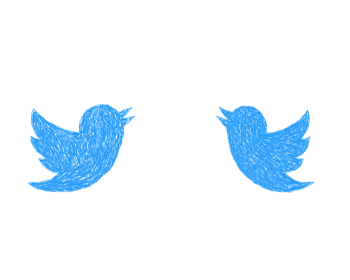

# *`Let's start by importing all the libraries we'll need for this`*

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk


# ***`Now, let's Read the data using pandas`***

In [2]:
data = pd.read_csv("Twitter_Data.csv")
data

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [3]:
#checking info of Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [4]:
#checking Null value of dataset
data.isnull().sum()

clean_text    4
category      7
dtype: int64

In [5]:
#checking shape of dataset
data.shape

(162980, 2)

In [6]:
data[data['category'].isna()]

,clean_text,category
130448,the foundation stone northeast gas grid inaugu...,NaN
155642,dear terrorists you can run but you cant hide ...,NaN
155698,offense the best defence with mission shakti m...,NaN
155770,have always heard politicians backing out thei...,NaN
158693,modi government plans felicitate the faceless ...,NaN
159442,chidambaram gives praises modinomics,NaN
160559,the reason why modi contested from seats 2014 ...,NaN


In [7]:
data[data['clean_text'].isna()]

,clean_text,category
148,NaN,0.0
158694,NaN,-1.0
159443,NaN,0.0
160560,NaN,1.0


In [8]:
data['clean_text'].fillna( method ='ffill', inplace = True)
data['category'].fillna( method ='ffill', inplace = True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162980 non-null  object 
 1   category    162980 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [10]:
data.isnull().sum()

clean_text    0
category      0
dtype: int64

*`Missingno library offers a very nice way to visualize the distribution of NaN values. Missingno is a Python library and compatible with Pandas.`*

In [11]:
# import missingno as msno
# msno.bar(data,figsize=(8,3),color='yellow')
# plt.show()

In [12]:
data.category[data.category == 1] = 'positive'
data.category[data.category == 0] = 'neutral'
data.category[data.category == -1] = 'negative'

<ipython-input-12-bde48d43293d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.category[data.category == 1] = 'positive'


# **Data Visualization**

In [13]:
data.category.value_counts()

positive    72253
neutral     55217
negative    35510
Name: category, dtype: int64

<AxesSubplot:xlabel='category', ylabel='count'>

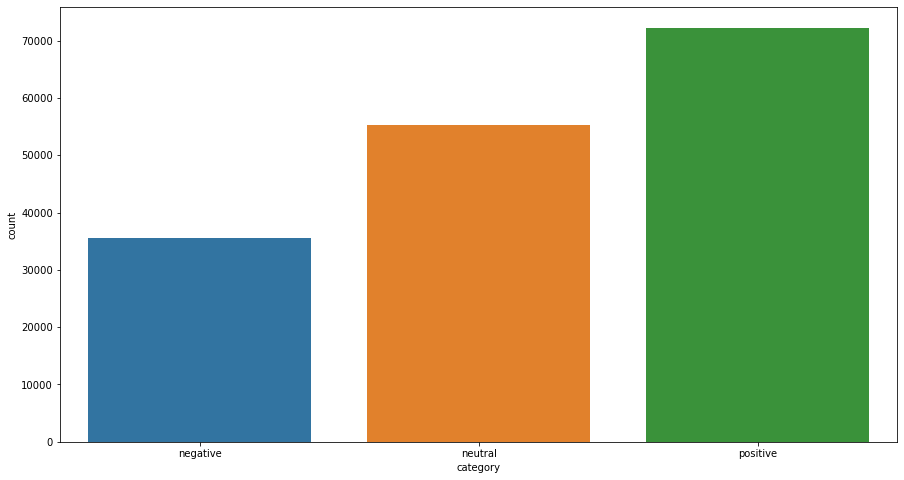

In [14]:
plt.figure(figsize=(15,8))
sns.countplot(x=data['category'],data=data)

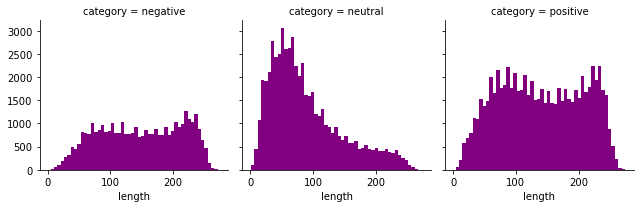

In [15]:
data.describe(include='all')
data['length'] = data['clean_text'].apply(len)
data.head()

graph = sns.FacetGrid(data=data,col='category')
graph.map(plt.hist,'length',bins=50,color='Purple')

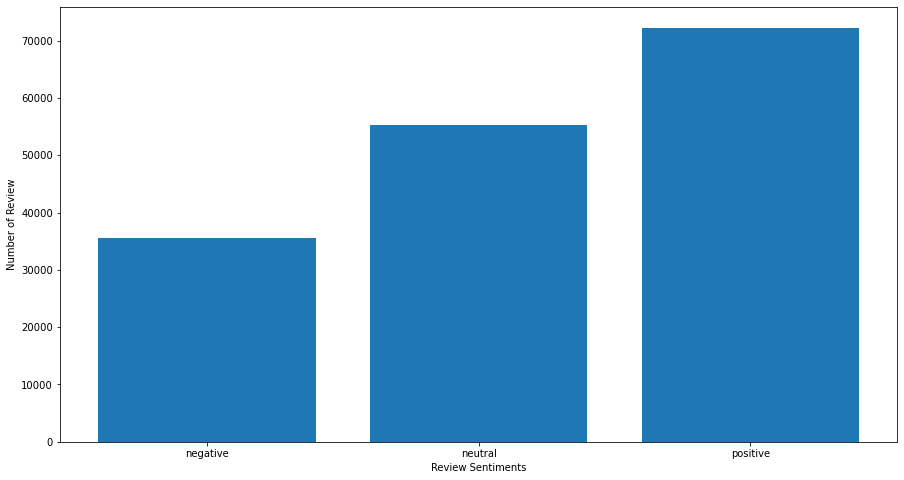

In [16]:
Sentiment_val=data.groupby('category').count()
plt.figure(figsize=(15,8))
plt.bar(Sentiment_val.index.values, Sentiment_val['clean_text'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()


In [17]:
# Plot the word cloud
from wordcloud import WordCloud

In [18]:
sentences = data['clean_text'].tolist()

In [19]:
len(sentences)

162980

In [20]:
#Joining sentences (combining all the sentences that we have)
sentences_as_single_string = " ".join(sentences)

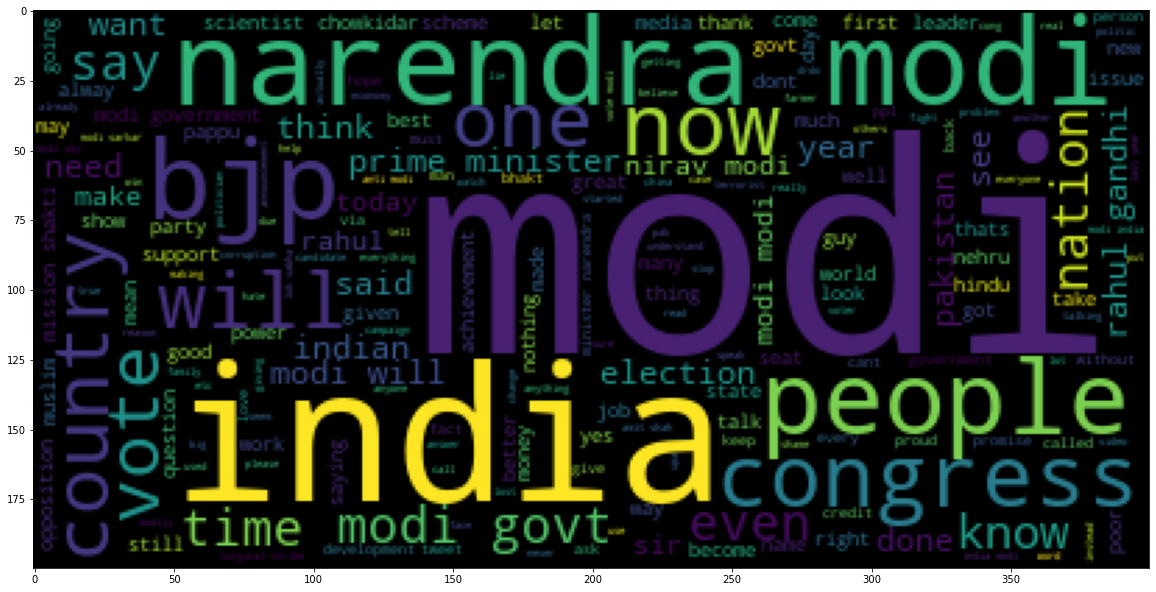

In [21]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_single_string))

In [22]:
neutral = data[data['category']=='neutral']

In [23]:
# Lets plot wordcloud of neutral words.
neutral_sentences = neutral['clean_text'].tolist()
neutral_string = " ".join(neutral_sentences)

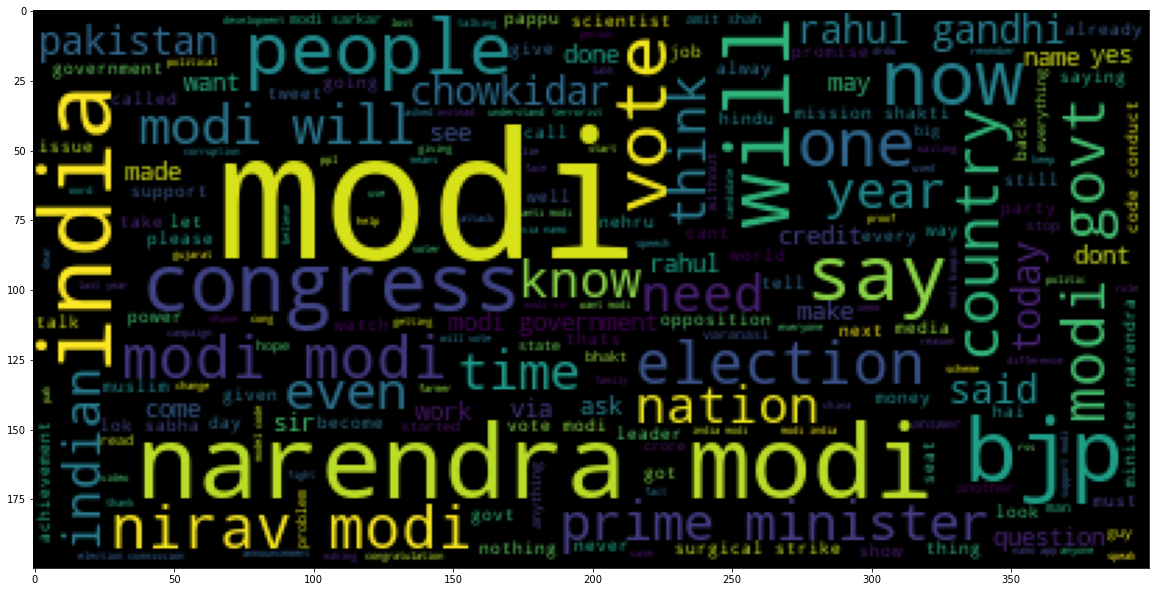

In [24]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(neutral_string))

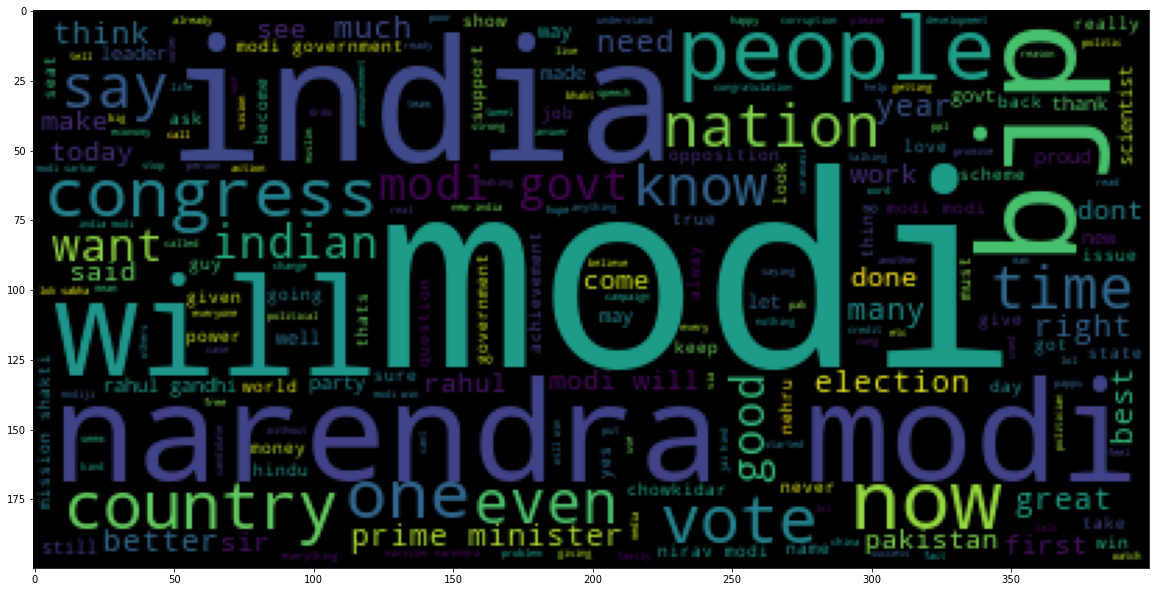

In [25]:
# Lets plot wordcloud of worry words.
positive = data[data['category']== 'positive']
positive_sentences = positive['clean_text'].tolist()
positive_string = " ".join(positive_sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(positive_string))

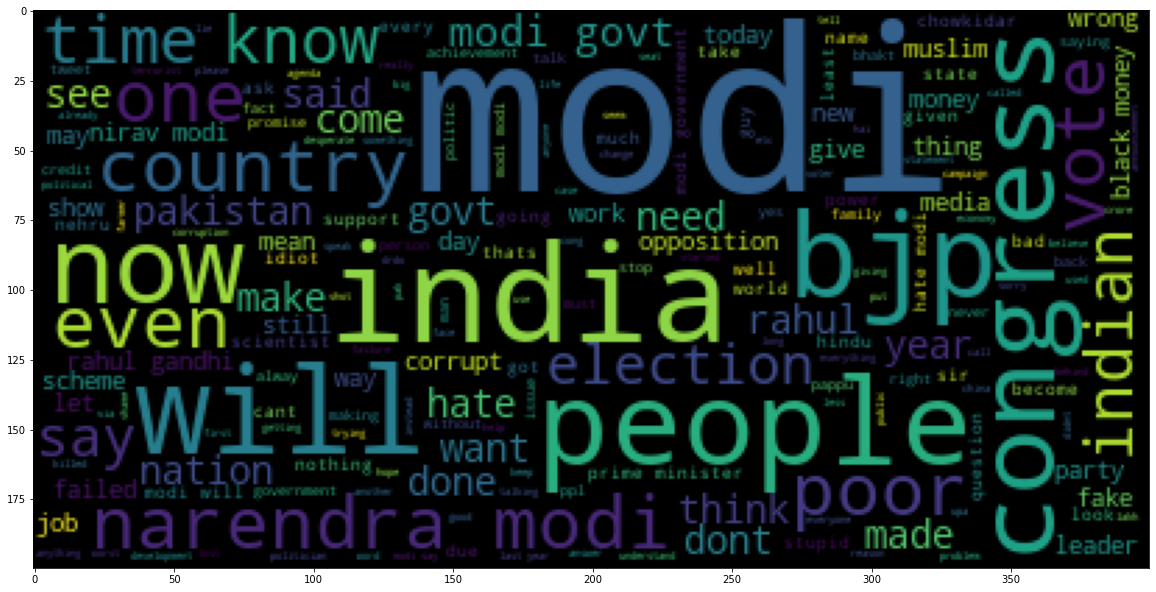

In [26]:
# Lets plot wordcloud of happiness words.
negative = data[data['category']== 'negative']
negative_sentences = negative['clean_text'].tolist()
negative_string = " ".join(negative_sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_string))

# **TEXT PREPROCESSING**

Data cleaning (Remove punctuations from text)

In [27]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
data.head(10)

,clean_text,category,length
0,when modi promised “minimum government maximum...,negative,210
1,talk all the nonsense and continue all the dra...,neutral,68
2,what did just say vote for modi welcome bjp t...,positive,117
3,asking his supporters prefix chowkidar their n...,positive,212
4,answer who among these the most powerful world...,positive,81
5,kiya tho refresh maarkefir comment karo,neutral,40
6,surat women perform yagna seeks divine grace f...,neutral,76
7,this comes from cabinet which has scholars lik...,neutral,84
8,with upcoming election india saga going import...,positive,156
9,gandhi was gay does modi,positive,26


In [29]:
#function to remove punctuations from text
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text



In [30]:
data.head(10)

,clean_text,category,length
0,when modi promised “minimum government maximum...,negative,210
1,talk all the nonsense and continue all the dra...,neutral,68
2,what did just say vote for modi welcome bjp t...,positive,117
3,asking his supporters prefix chowkidar their n...,positive,212
4,answer who among these the most powerful world...,positive,81
5,kiya tho refresh maarkefir comment karo,neutral,40
6,surat women perform yagna seeks divine grace f...,neutral,76
7,this comes from cabinet which has scholars lik...,neutral,84
8,with upcoming election india saga going import...,positive,156
9,gandhi was gay does modi,positive,26


# **removing url**

In [31]:
data['clean_text'] = data['clean_text'].str.replace('http\S+|www.\S+', '', case=False)

In [32]:
data.head(10)

,clean_text,category,length
0,when modi promised “minimum government maximum...,negative,210
1,talk all the nonsense and continue all the dra...,neutral,68
2,what did just say vote for modi welcome bjp t...,positive,117
3,asking his supporters prefix chowkidar their n...,positive,212
4,answer who among these the most powerful world...,positive,81
5,kiya tho refresh maarkefir comment karo,neutral,40
6,surat women perform yagna seeks divine grace f...,neutral,76
7,this comes from cabinet which has scholars lik...,neutral,84
8,with upcoming election india saga going import...,positive,156
9,gandhi was gay does modi,positive,26


In [33]:
data['tweet'] = data['clean_text'].apply(remove_punctuations)

In [34]:
data.head()

,clean_text,category,length,tweet
0,when modi promised “minimum government maximum...,negative,210,when modi promised “minimum government maximum...
1,talk all the nonsense and continue all the dra...,neutral,68,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...,positive,117,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...,positive,212,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...,positive,81,answer who among these the most powerful world...


# **Removing Stopword**

In [35]:
# storing the stopwors of english language in variable stop
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
stop

[nltk_data] Downloading package stopwords to C:\Users\Akash
[nltk_data]     Srivastava\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [36]:
data['tweet_without_stopwords'] = data['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [37]:
data.head(10)

,clean_text,category,length,tweet,tweet_without_stopwords
0,when modi promised “minimum government maximum...,negative,210,when modi promised “minimum government maximum...,modi promised “minimum government maximum gove...
1,talk all the nonsense and continue all the dra...,neutral,68,talk all the nonsense and continue all the dra...,talk nonsense continue drama vote modi
2,what did just say vote for modi welcome bjp t...,positive,117,what did just say vote for modi welcome bjp t...,say vote modi welcome bjp told rahul main camp...
3,asking his supporters prefix chowkidar their n...,positive,212,asking his supporters prefix chowkidar their n...,asking supporters prefix chowkidar names modi ...
4,answer who among these the most powerful world...,positive,81,answer who among these the most powerful world...,answer among powerful world leader today trump...
5,kiya tho refresh maarkefir comment karo,neutral,40,kiya tho refresh maarkefir comment karo,kiya tho refresh maarkefir comment karo
6,surat women perform yagna seeks divine grace f...,neutral,76,surat women perform yagna seeks divine grace f...,surat women perform yagna seeks divine grace n...
7,this comes from cabinet which has scholars lik...,neutral,84,this comes from cabinet which has scholars lik...,comes cabinet scholars like modi smriti hema t...
8,with upcoming election india saga going import...,positive,156,with upcoming election india saga going import...,upcoming election india saga going important p...
9,gandhi was gay does modi,positive,26,gandhi was gay does modi,gandhi gay modi


In [38]:
## Lemmatizer object
from nltk.stem.wordnet import WordNetLemmatizer

wn = WordNetLemmatizer()

In [39]:
import re
import nltk
nltk.download('wordnet')
def clean_text(st):
    cleaned = re.sub("[^A-z]", " ", st)
    cleaned = cleaned.lower().split()
    cleaned = [wn.lemmatize(wrd) for wrd in cleaned if wrd not in stopwords.words("english")]
    return " ".join(cleaned)

[nltk_data] Downloading package wordnet to C:\Users\Akash
[nltk_data]     Srivastava\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [40]:
data['lemmatize_tweet'] = data["tweet"] .apply(lambda x:clean_text(x))

In [41]:
data.head(10)

,clean_text,category,length,tweet,tweet_without_stopwords,lemmatize_tweet
0,when modi promised “minimum government maximum...,negative,210,when modi promised “minimum government maximum...,modi promised “minimum government maximum gove...,modi promised minimum government maximum gover...
1,talk all the nonsense and continue all the dra...,neutral,68,talk all the nonsense and continue all the dra...,talk nonsense continue drama vote modi,talk nonsense continue drama vote modi
2,what did just say vote for modi welcome bjp t...,positive,117,what did just say vote for modi welcome bjp t...,say vote modi welcome bjp told rahul main camp...,say vote modi welcome bjp told rahul main camp...
3,asking his supporters prefix chowkidar their n...,positive,212,asking his supporters prefix chowkidar their n...,asking supporters prefix chowkidar names modi ...,asking supporter prefix chowkidar name modi gr...
4,answer who among these the most powerful world...,positive,81,answer who among these the most powerful world...,answer among powerful world leader today trump...,answer among powerful world leader today trump...
5,kiya tho refresh maarkefir comment karo,neutral,40,kiya tho refresh maarkefir comment karo,kiya tho refresh maarkefir comment karo,kiya tho refresh maarkefir comment karo
6,surat women perform yagna seeks divine grace f...,neutral,76,surat women perform yagna seeks divine grace f...,surat women perform yagna seeks divine grace n...,surat woman perform yagna seek divine grace na...
7,this comes from cabinet which has scholars lik...,neutral,84,this comes from cabinet which has scholars lik...,comes cabinet scholars like modi smriti hema t...,come cabinet scholar like modi smriti hema tim...
8,with upcoming election india saga going import...,positive,156,with upcoming election india saga going import...,upcoming election india saga going important p...,upcoming election india saga going important p...
9,gandhi was gay does modi,positive,26,gandhi was gay does modi,gandhi gay modi,gandhi gay modi


In [42]:
#dropping unnecessary column
data=data.drop(columns=['tweet', 'tweet_without_stopwords'])

In [43]:
data.head(10)

,clean_text,category,length,lemmatize_tweet
0,when modi promised “minimum government maximum...,negative,210,modi promised minimum government maximum gover...
1,talk all the nonsense and continue all the dra...,neutral,68,talk nonsense continue drama vote modi
2,what did just say vote for modi welcome bjp t...,positive,117,say vote modi welcome bjp told rahul main camp...
3,asking his supporters prefix chowkidar their n...,positive,212,asking supporter prefix chowkidar name modi gr...
4,answer who among these the most powerful world...,positive,81,answer among powerful world leader today trump...
5,kiya tho refresh maarkefir comment karo,neutral,40,kiya tho refresh maarkefir comment karo
6,surat women perform yagna seeks divine grace f...,neutral,76,surat woman perform yagna seek divine grace na...
7,this comes from cabinet which has scholars lik...,neutral,84,come cabinet scholar like modi smriti hema tim...
8,with upcoming election india saga going import...,positive,156,upcoming election india saga going important p...
9,gandhi was gay does modi,positive,26,gandhi gay modi


<function matplotlib.pyplot.show(close=None, block=None)>

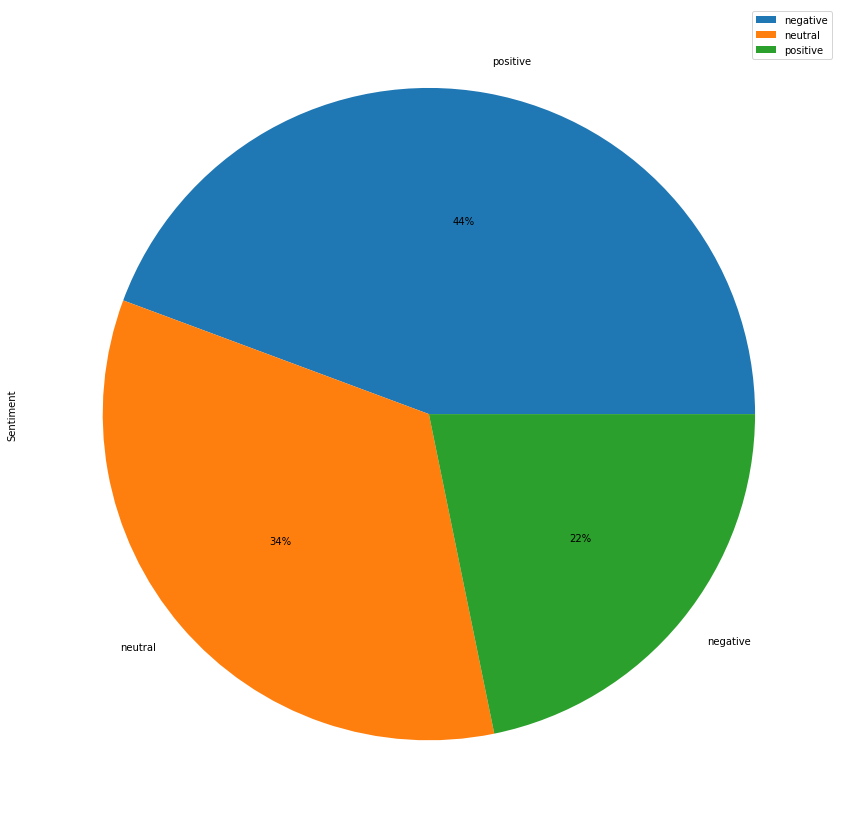

In [44]:
#let's plot pie plot for the sentiment analysis
data['category'].value_counts().plot(kind='pie' ,autopct ='%1.0f%%', figsize = (15,15))
plt.ylabel("Sentiment")
plt.legend(data['category'])
plt.show

In [45]:
#perfroming label encoding on Sentiment
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['category']= le.fit_transform(data['category'])
data.head(10)

,clean_text,category,length,lemmatize_tweet
0,when modi promised “minimum government maximum...,0,210,modi promised minimum government maximum gover...
1,talk all the nonsense and continue all the dra...,1,68,talk nonsense continue drama vote modi
2,what did just say vote for modi welcome bjp t...,2,117,say vote modi welcome bjp told rahul main camp...
3,asking his supporters prefix chowkidar their n...,2,212,asking supporter prefix chowkidar name modi gr...
4,answer who among these the most powerful world...,2,81,answer among powerful world leader today trump...
5,kiya tho refresh maarkefir comment karo,1,40,kiya tho refresh maarkefir comment karo
6,surat women perform yagna seeks divine grace f...,1,76,surat woman perform yagna seek divine grace na...
7,this comes from cabinet which has scholars lik...,1,84,come cabinet scholar like modi smriti hema tim...
8,with upcoming election india saga going import...,2,156,upcoming election india saga going important p...
9,gandhi was gay does modi,2,26,gandhi gay modi


# **Tokenization**

In [46]:
tokenized_tweet = data['lemmatize_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [modi, promised, minimum, government, maximum,...
1        [talk, nonsense, continue, drama, vote, modi]
2    [say, vote, modi, welcome, bjp, told, rahul, m...
3    [asking, supporter, prefix, chowkidar, name, m...
4    [answer, among, powerful, world, leader, today...
Name: lemmatize_tweet, dtype: object

# **Stemming**

In [47]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [modi, promis, minimum, govern, maximum, gover...
1          [talk, nonsens, continu, drama, vote, modi]
2    [say, vote, modi, welcom, bjp, told, rahul, ma...
3    [ask, support, prefix, chowkidar, name, modi, ...
4    [answer, among, power, world, leader, today, t...
Name: lemmatize_tweet, dtype: object

In [48]:
tokenized_tweet
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

data['lemmatize_tweet']= tokenized_tweet

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(data['lemmatize_tweet'])

In [50]:
tfidf

<162980x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1380088 stored elements in Compressed Sparse Row format>

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(data.lemmatize_tweet, data.category, test_size=0.25, random_state=0)

In [53]:
vectorizer = TfidfVectorizer(min_df=3, max_df=0.9)

train_vectors = vectorizer.fit_transform(x_train)
test_vectors = vectorizer.transform(x_test)

In [54]:
#importing the MultinomialNB from sklearn.naive bayes
from sklearn.naive_bayes import MultinomialNB

In [55]:
emotion= MultinomialNB().fit(train_vectors, y_train)


In [56]:
y_pred = emotion.predict(test_vectors)

In [57]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

print("Model Accuracy Score : ",accuracy_score(y_test,y_pred))

Model Accuracy Score :  0.6591238188734814


In [58]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=100000)

In [59]:
lr.fit(train_vectors, y_train)

LogisticRegression(max_iter=100000)

In [60]:
y_pred1 =lr.predict(test_vectors)

In [61]:
accuracy_score(y_test,y_pred1)

0.8426309976684255

In [62]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  

In [63]:
detect_sentiment = classifier.fit(train_vectors, y_train)


In [73]:
y_pred2 =classifier.predict(test_vectors)
accuracy_score(y_test,y_pred2)

0.8532089826972634

In [74]:
from xgboost import XGBClassifier
	
model = XGBClassifier()
model.fit(train_vectors, y_train)
y_pred3 =model.predict(test_vectors)
accuracy_score(y_test,y_pred3)

[14:30:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8098171554791999

In [94]:
data2 = ['what did just say vote for modi  welcome bjp told you rahul the main campaigner for modi think modi should just relax
]

SyntaxError: EOL while scanning string literal (<ipython-input-94-2d5134e85e0e>, line 1)

In [76]:
test = vectorizer.transform(data2)

In [77]:
y_pred4=classifier.predict(test)

In [78]:
y_pred4

array([2])

In [79]:
import joblib
joblib.dump(detect_sentiment,'pickle.pkl')

['pickle.pkl']

In [80]:
import pickle
#lets store your model into save pickel

saved_model = pickle.dumps(detect_sentiment)
model =pickle.loads(saved_model)
y_pred = model.predict(test)

In [81]:
y_pred

array([2])

In [89]:
joblib.dump(vectorizer,'transform.pkl')

['transform.pkl']

In [90]:
test = open('transform.pkl.', 'rb')
cv = joblib.load(test)

In [91]:
tesrvc = cv.transform(data2)

In [92]:
y_pred25 = model.predict(tesrvc)

In [93]:
y_pred25

array([2])